# Normalisation
---

Given that $x \in X$ and $x' \in X'$, we can implement the normalisation mapping $N\colon X \rightarrow X'$ as follows:

# $x' = \frac{(x - X_{min})}{(X_{max} - X_{min})}  (X'_{max} - X'_{min}) + X'_{min}$

---
Below, we will define a dataset $X$ and then normalise it

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = np.linspace(5,100,20).reshape(4,5)
print(X)

[[   5.   10.   15.   20.   25.]
 [  30.   35.   40.   45.   50.]
 [  55.   60.   65.   70.   75.]
 [  80.   85.   90.   95.  100.]]


In [4]:
def Normalise(matrix, maxPrime, minPrime):
    
    maximum = np.max(matrix)
    minimum = np.min(matrix)
    
    numerator = [x - minimum for x in np.nditer(matrix)]    
    denominator = maximum - minimum
    multiplier = maxPrime - minPrime
    
    XNorm = (numerator / denominator) * multiplier + minPrime
    
    return XNorm

In [5]:
XN = Normalise(X, 1, 0.05).reshape(4,5)
print(XN)
print(XN.shape)

[[ 0.05  0.1   0.15  0.2   0.25]
 [ 0.3   0.35  0.4   0.45  0.5 ]
 [ 0.55  0.6   0.65  0.7   0.75]
 [ 0.8   0.85  0.9   0.95  1.  ]]
(4, 5)


---
## Let us apply the mapping to a real dataset

---

In [6]:
keplerTest = pd.read_csv("/Users/taimur/Documents/DataSets/Kepler/V3/exoTest.csv")

In [7]:
keplerSubset = keplerTest.iloc[3:6,3:9]
keplerSubset = pd.DataFrame.as_matrix(keplerSubset)

In [8]:
keplerSubset

array([[-846.12, -836.03, -745.5 , -784.69, -791.22, -746.5 ],
       [  -9.16,   -6.37,  -16.13,  -24.05,   -0.9 ,  -45.2 ],
       [  14.56,   12.42,   12.07,   12.92,   12.27,    3.19]])

In [9]:
kNorm = Normalise(keplerSubset,1,0)
# kNorm = Normalise(keplerTest.iloc[1:,1:],1,0)

In [10]:
kNorm = kNorm.reshape(3,6)
kNorm = pd.DataFrame(kNorm)

In [11]:
print(type(kNorm))
print(kNorm)

<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         4         5
0  0.000000  0.972440  1.000000  0.011723  0.975682  0.997514
1  0.116908  0.964342  0.997107  0.071374  0.955140  0.998095
2  0.063787  0.982037  0.997339  0.115746  0.930567  0.986790


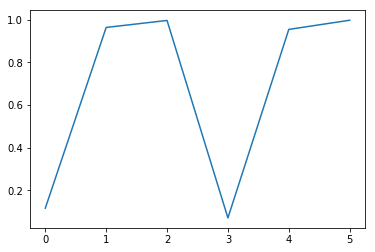

In [12]:
plt.plot(kNorm.iloc[1,0:])

In [13]:
keplerSubsetO = keplerTest.iloc[3:6,3:9]
keplerSubsetO = pd.DataFrame.as_matrix(keplerSubsetO)
keplerSubsetO = pd.DataFrame(keplerSubsetO)
print(keplerSubsetO)

        0       1       2       3       4       5
0 -846.12 -836.03 -745.50 -784.69 -791.22 -746.50
1   -9.16   -6.37  -16.13  -24.05   -0.90  -45.20
2   14.56   12.42   12.07   12.92   12.27    3.19


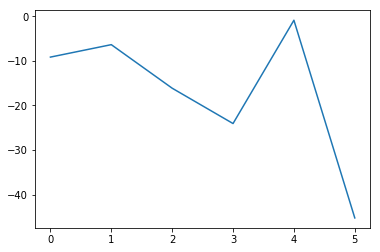

In [14]:
plt.plot(keplerSubsetO.iloc[1,0:])

In [15]:
# pd.DataFrame.to_csv(kNorm, "/Users/taimur/Desktop/kNorm.csv")

---
Let us imagine a numberLine that extends from [0,6]:

---

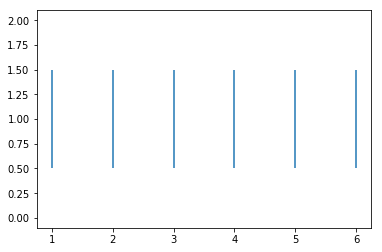

In [24]:
numberLine = np.linspace(1,6,6,endpoint=True)
plt.eventplot(numberLine)

---

Now, let us create some data for numberLine. We will generate three trends, and plot them:

---

In [37]:
trend1 = [3,4,6]
trend2 = [0,4,5]
trend3 = [1,2,3]

trends = [trend1, trend2, trend3]
trends = pd.DataFrame(trends)
trends

,0,1,2
0,3,4,6
1,0,4,5
2,1,2,3


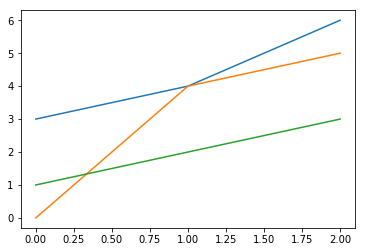

In [50]:
plt.plot(trends.iloc[0])
plt.plot(trends.iloc[1])
plt.plot(trends.iloc[2])

We want to Normalise these trends between 0 and 1. If we apply our formula for each row, and then plot the results, we should see the same thing.

0    3
1    4
2    6
Name: 0, dtype: int64
[ 1.          0.66666667  0.        ]
[ 3.  4.  6.]


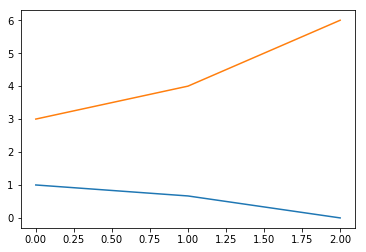

In [58]:
trends1N = Normalise(trends.iloc[0],0,1)
print(trends.iloc[0])
print(trends1N)
plt.plot(trends1N)
trends1NN = Normalise(trends1N,3,6)
print(trends1NN)
plt.plot(trends1NN)

---
The 'shape' of the trend is not being preserved after being input to the function. However, the original shape can be retrieved by re-feeding the output trend back into the function. The function needs to be re-written. Let us re-generate the test dataset:

---

In [67]:
dataset = pd.DataFrame(np.random.randint(0,10, size=(4,10)))
print(dataset)

   0  1  2  3  4  5  6  7  8  9
0  5  1  5  6  6  5  2  0  1  2
1  8  3  0  9  5  6  7  9  4  8
2  0  3  1  1  7  0  1  0  6  4
3  6  3  6  9  7  2  6  6  0  6


IndexError: single positional indexer is out-of-bounds

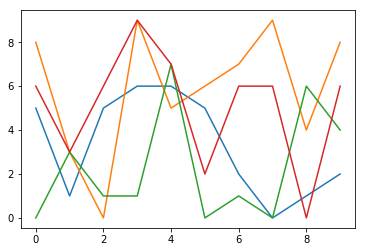

In [68]:
for trend in dataset:
    plt.plot(dataset.iloc[trend])